Öncelikle bize gerekli olan modülleri import edelim. Modüllerimizi import ettikten sonra verilerimizi içerek dosyayı bir değişkene atayarak okutturalım.

In [3]:
import pandas as pd #Verimizi okumaya başlarken modüllerimizi import edelim.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
kalpdata = pd.read_csv("cardio_train.csv", sep=";")   #Veri dosyamızı incelemek ve okumak için giriyoruz.

Verilerimiz ";" ile ayrıldığından ayrılma biçimini belirtmemiz gerekli olduğu için "sep" kodu ile belirtmemiz gerekli aksi taktirde tüm veriler birleşik halde olacaktır.

In [4]:
kalpdata.head()      #Veri setimizin ilk 5 verisine genel bir bakış atalım.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Gördüğümüz üzere tam 12 tane değişkenimiz mevcut. Daha detaylı bilgi için ".info()" komutumuz ile bilgi alalım.

In [5]:
kalpdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


".info()" komutu sonucunda, verimizin 70000 adet satır ve 13 adet sütundan oluştuğunu görüyoruz. Aynı zamanda bize herhangi bir veri içerisinde hata olmadığını ve temize çekildiğini gösteriyor.                     
**Sırasıyla**:

1. **age** – Yaş (gün)
2. **gender** – 1: Kadın, 2: Erkek
3. **height** – Boy (cm) 
4. **weight** – Kilo (kg)
5. **ap_hi** – Sistolik kan basıncı (Büyük tansiyon)
6. **ap_lo** – Diyastolik kan basıncı (Küçük tansiyon)
7. **cholesterol** – 1: normal, 2: yüksek, 3: çok yüksek
8. **gluc** – Glukoz (1: normal, 2: yüksek, 3: çok yüksek)
9. **smoke** – Sigara kullanımı (0: Hayır, 1: Evet)
10. **alco** – Alkol kullanımı (0: Hayır, 1: Evet)
11. **active** – Fiziksel aktivite (0: Hayır, 1: Evet)
12. **cardio** – Kardiyovasküler hastalık (0: Yok, 1: Var)


Olmak üzere 12 tane veri türümüz mevcut. Biz burada 12. yani "Kardiyovasküler Hastalığın Varlığı veya Yokluğu" kısmını hedefliyor olacağız. Amacımız 11 adet değişkeni göz önünde bulundurarak hastanın kardiyovasküler herhangi bir hastalığının olup olmayacağını Lojistik Regresyon yöntemi ile makine öğrenmesi gerçekleştirip öngörmeye çalışmak.

In [6]:
kalpdata.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


".describe()" komutu ile değişkenlerimize dair temel bilgileri alıyoruz. Görüldüğü üzere sütunların **mean**, **max**, **std** ve **min** değerlerinin yanı sıra, **%25**, **%50** ve **%75** gibi ifadeleri de mevcut. Kısaca özetlemem gerekirse:                                                

**Min** ve **max** : O sütundaki en küçük ve en büyük sayı değerlerini verir.                                                                  
**Mean**: sütun değerlerinin ortalamasını, **std** ise standart sapma değerini verir.                             
**%25**, **%50** ve **%75** değerleri de sütundaki değerlerin yüzde kaçının o değere eşit veya altında olduğunu gösterir.

In [7]:
kalpdata.value_counts("cardio")       #Hedeflediğimiz veri tipinin dağılımına bakmak adına ".value_counts" komutunu hedeflediğimiz veriyi yazarak kullandık.

cardio
0    35021
1    34979
Name: count, dtype: int64

Veri setimizin içerisindeki hedeflediğimiz veri olan "cardio" yani hastalık olup olmadığını bize gösteren değerin dağılımına baktık. Bize gösterilen sonuca baktığımızda, hasta olmayan **"35021"**, hasta olan **"34979"** kişi, yani hemen hemen yarı yarıya bir oran mevcut. Oranı hesaplamak gerekirse **%50,03-%49,97** oran görmekteyiz. Dağılımın birbirine bu kadar yakın olması **"Accuracy"** ve **"F1 Score"** gibi sonuçların daha iyi ve güvenilir olmasını sağlar. 

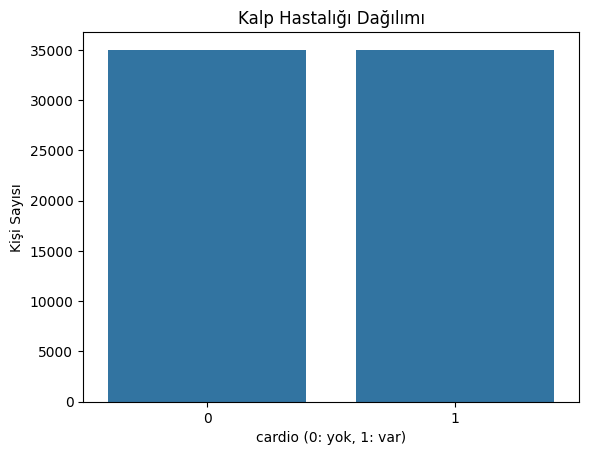

In [8]:
sns.countplot(x="cardio", data=kalpdata)       #Seaborn kütüphanesinden bir önceki veriyi doğrulaması için daha görsel bir yöntem kullanalım.
plt.title("Kalp Hastalığı Dağılımı")        #Başlığımız.
plt.xlabel("cardio (0: yok, 1: var)")      #"x" ekseninde yazmasını istediğimiz yazı.
plt.ylabel("Kişi Sayısı")                  #"y" ekseninde yazmasını istediğimiz yazı.
plt.show()

Bir başka inceleme yöntemi ile baktığımızda ise bir önceki ".value_counts()" komutunun bize verdiği bilginin doğru olduğunu görmekteyiz.

Şimdi veri setimizin içeriklerine bir bakış atalım. İşimize yaramyacak yer tespit edersek çıkaralım ve temize çekelim.

In [9]:
kalpdata.columns       #Veri setimizin içerisinde bulunan sütunlara bir bakış atalım.

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

Gördüğümüz üzere en başta "id" adında bir değişken mevcut. Bu değişken kişilerin verilerini numaralandırmak için kullanıldığından bizim hiçbir işimize yaramayacak ve modelimizi yanıltabilir. O nedenle veri setimizin içerisinden çıkartalım.

In [10]:
kalpdata.drop(columns=["id"], inplace=True)     #id kısmı fazlalık olduğu için çıkarttık.

Tekrardan veri setimizin içerisindeki sütunlara **".columns"** ve **".head()"** komutu ile bir bakış atalım.

In [11]:
kalpdata.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [12]:
kalpdata.head()          #ilk beş veriyi kontrol edelim.

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Görüldüğü üzere fazlalık olan kısmı çıkarttık. Tekrardan veri tablomuzu incelediğimizde **"age"** yani **"yaş"** kısmı gün cinsinden yani kişinin kaç gündür yaşadığını gösterdiğini fark ediyoruz. Bize lazım olan veri gün cinsinden değil yıl cinsinden olmalı ki kişinin kaç yaşında olduğunu daha net bilelim.

In [13]:
kalpdata["age"] = kalpdata["age"] / 365                 #Gün cinsinden olan verimizi, yıl cinsine çevirmek adına 365 ile böldük.
kalpdata.rename(columns={"age": "age_years"}, inplace= True)      #Verinin orijinalinde "age" olan kısmı yıl cinsinden yazacağımız için değişkenimizin ismini "age_years" olarak değiştirdik.

Tekrardan tablomuzu **".head()"** komutuyla kontrol edelim.

In [14]:
kalpdata.head()

,age_years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


Görüldüğü üzere verimizdeki kişilerin yaşları yıl cinsinden oldu fakat çok küsüratlı olmasını istemiyoruz o yüzden sadece son iki basamak kalacak şekilde yuvarlayalım.

In [15]:
kalpdata["age_years"] = kalpdata["age_years"].round(2)        #Verimizin son iki basamağı kalacak şekilde yuvarlanmasını istedik.

Şimdi tekrardan **".head()"** komutu ile kontrol edelim.

In [16]:
kalpdata.head()

,age_years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.39,2,168,62.0,110,80,1,1,0,0,1,0
1,55.42,1,156,85.0,140,90,3,1,0,0,1,1
2,51.66,1,165,64.0,130,70,3,1,0,0,0,1
3,48.28,2,169,82.0,150,100,1,1,0,0,1,1
4,47.87,1,156,56.0,100,60,1,1,0,0,0,0


Bu şekilde çok daha temiz bir yaş verimiz oldu. Şimdi ise cinsiyet sayılarını inceleyelim.

In [17]:
kalpdata["gender"].value_counts()       #Verimizin içerisindeki cinsiyet sayısının dağılımına baktık. Belirtilen "1" ve "2" değerlerinin karşılıklarını kontrol ettik.

gender
1    45530
2    24470
Name: count, dtype: int64

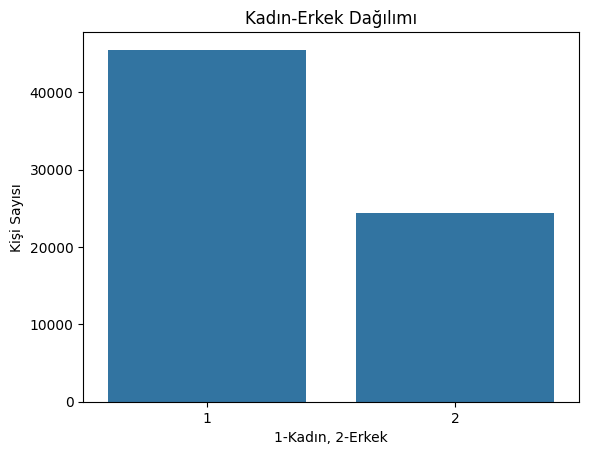

In [18]:
sns.countplot(x="gender", data=kalpdata)                 #Kadın-Erkek dağılımını görselleştirdik.
plt.title("Kadın-Erkek Dağılımı")
plt.xlabel("1-Kadın, 2-Erkek")
plt.ylabel("Kişi Sayısı")
plt.show()

Verimizin doğruluğunu kontrol ettik. Görüldüğü üzere kadınlar erkeklerin neredeyse iki katı durumda. Bu nedenle modelimiz, cinsiyete göre öngörülerde bulunacaksa hata yapma oranı cinsiyete göre değişiklik gösterecektir. Biz bunu istemediğimiz için **cinsiyet** özelinde bir değerlendirme yaptırmayacağız. 

Şimdi ise elimizdeki sayısal verileri ölçekleyelim. Amacımız elimizdeki tüm sayısal verileri aynı skala üzerine getirmek olmalı. Aksi taktirde örneğin:    
                          
**"height"** = 150,                                                                                                    
**"cholesterol"** = 2 ise,                                                                                                    

"height" değeri modelimizin dikkatini daha çok çekeceğinden kafasını karıştırabilir. Biz bunu istemiyoruz o yüzden ölçeklendirme yaparak işini kolaylaştıracağız.

In [19]:
from sklearn.preprocessing import StandardScaler                           #Gerekli olan modülü import ettik.      

sayisaldegerler = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']                   #Sayısal değerlere sahip verilerimizi liste yaptık.
skala = StandardScaler()                                                                #Import ettiğimiz skala modülünü "skala" değişkenine atadık.
kalpdata[sayisaldegerler] = skala.fit_transform(kalpdata[sayisaldegerler])              #Sayısal değerlerimizi ölçekledik.

Yaptığımız ölçeklemenin sağlamasını yapalım.

In [20]:
kalpdata[sayisaldegerler].mean()                         #mean ve standart sapma değerlerini kontrol ettik. Standart sapması 1 olduğu için başarılı saydık.    
kalpdata[sayisaldegerler].std()

age_years    1.000007
height       1.000007
weight       1.000007
ap_hi        1.000007
ap_lo        1.000007
dtype: float64

Görüldüğü üzere ölçeklememiz başarılyla gerçekleşmiş durumda. Bir de grafik üzerinden yorumlayalım

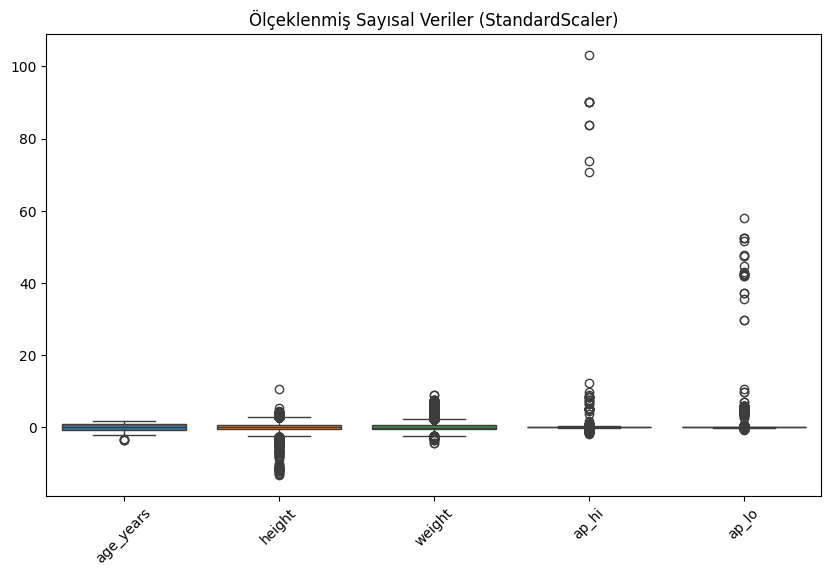

In [21]:
plt.figure(figsize=(10, 6))                                                   #Yine seaborn üzerinden bir grafik ile sağlamamızı destekledik.
sns.boxplot(data=kalpdata[sayisaldegerler])
plt.title("Ölçeklenmiş Sayısal Veriler (StandardScaler)")
plt.xticks(rotation=45)
plt.show()

Grafikte görüldüğü üzere ölçeklememiz başarıyla tamamlanmış. **"ap_hi ve ap_lo"** değerlerinde bazı aykırılıklar olabilir çünkü verimizin içerisinde bazı kişilerin tansiyon değerleri alışılmışın dışında olduğundan ötürü grafiğimizde aykırılık mevcut.

Verilerimizi inceledik ve bize gerekli olan kısımları düzenleyip temize çektik. Sırada modelimizi kurmak ve eğitmek var.

In [22]:
x = kalpdata.drop(columns=["cardio"])     #Datamızdan "cardio" yani hedefimizi çıkartarak diğer değişkenleri yalnız bıraktık.

y = kalpdata["cardio"]         #Modelimizin tahmin etmeye çalışacağı "cardio" değerini değişkene atadık.

Verilerimizi eğitmek için **"x"** ve **"y"** değişkenlerine değerlerimizi atadık. Sırada modül kütüphanesinden ihtiyacımız olan modülü çekip eğitim ve test bölümü olarak ikiye ayıracağız.  

In [23]:
from sklearn.model_selection import train_test_split         #Eğitim ve test bölümü olarak ikiye ayırmamızı sağlayan modülü çektik.

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)    #"x" ve "y" değişkenlerimi eğitim ve test olarak ikiye ayırdık ve parametrelerini belirledik.

Yukarıda belirlediğimiz üzere verilerimizin %30’u **"test_size=0,3"** komutu ile test setine ayrıldı. **"random_state=42"** komutu sayesinde ise her çalıştırıldığında aynı verileri kullanmasını sağladık. Kısaca özetlemem gerekirse **rastgeleliği sabitlemiş** olduk. Sırada modelimizi istediğimiz yöntem ile eğitmek var.

In [24]:
from sklearn.linear_model import LogisticRegression    #Logistic Regression kullanacağımız için modülümüzü importladık.
model = LogisticRegression(max_iter=1000)                 #Kolaylık olması açısından modülümüzü "model" değişkenine atadık.
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

Üstteki mesaj kutucuğunda göründüğü üzere **"LogisticRegression"** yöntemi ile eğitim başarıyla tamamlandı. Şimdi ise modelimizle tahmin yapalım.

In [25]:
y_pred = model.predict(x_test)      #Modelimize "x" olarak belirlediğimiz ve eğittiğimiz değerler ile tahmin yapmasını .predict() komutuyla söylemiş olduk.
y_pred[:10]          #Bize ilk 10 tahminini vermesini söyledik.

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

Sonuçlara baktığımızda, modelimiz 10 adet tahmin yapmış bulunmakta ve incelediğimizde 6 adet hasta, 4 adet sağlıklı sonuç aldık. Modelimiz bu haliyle tahmin yapabilir durumda. Sırada yapmamız gereken şey modelimizin performansını değerlendirmek olacaktır. Öncelikle gerekli modülleri import etmekle başlayalım.

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay  #İhtiyacımız olan değerlendirme modüllerini import ettik.

Gereken modüllerimizi import ettik. Şimdi ise sırasıyla hesaplamalarını yaptırmak.

In [27]:
acc = accuracy_score(y_test,y_pred)     #Accuracy puanımız.
pre = precision_score(y_test,y_pred)    #Precision puanımız.
rec = recall_score(y_test,y_pred)       #Recall puanımız.
f1 = f1_score(y_test, y_pred)           #F1 puanımız.

print(f"Accuracy: {acc:.2f}")          #Puanlarımızı yazdıralım.
print(f"Precision: {pre:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.72
Precision: 0.74
Recall: 0.68
F1 Score: 0.71


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73     10461
           1       0.74      0.68      0.71     10539

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



**Accuracy**: Modelin genel doğruluk oranı: %72 doğru.                                           
**Precision**: Pozitif dediği kişilerin %75’i gerçekten pozitif.                                   
**Recall**: Gerçek hastaların %68’ini bulabiliyor.                                   
**F1 Score**: Precision ve Recall’ın dengeli ortalaması.                                 

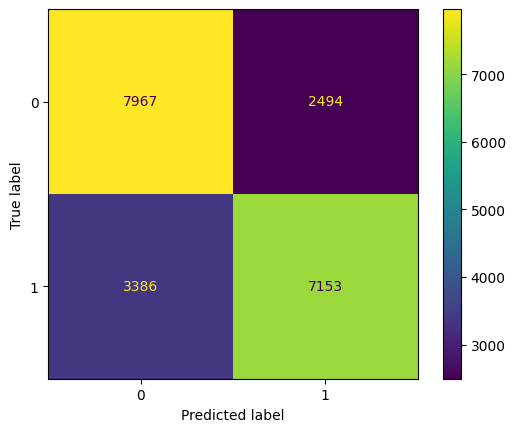

In [29]:
cm = confusion_matrix(y_test, y_pred)          
cmgoruntu = ConfusionMatrixDisplay(confusion_matrix=cm)   #Confusion Matrix'i görsele dökelim.
cmgoruntu.plot()

**Modelimiz**:

TN (Gerçek 0, Tahmin 0)	7967	Sağlıklı kişiyi doğru tanımış.                                       
FP (Gerçek 0, Tahmin 1)	2494	Sağlıklı kişiyi yanlışlıkla hasta demiş .                                     
FN (Gerçek 1, Tahmin 0)	3386	Hasta kişiyi sağlıklı demiş.                                     
TP (Gerçek 1, Tahmin 1)	7153	Hasta kişiyi doğru tahmin etmiş.                                     



Bu aldığımız sonuçlar başarı açısından değerlendirildiğinde ve sözkonusu sağlık olduğundan yeterli gelmeyeceğinden optimize edip başarı oranını yükseltmemiz gerekmekte. Bunun için **"GridSearchCV"** aracılığıyla modelimizi optimize edecek ve doğruluk oranlarını arttırmayı hedefleyeceğiz. Öncelikle modülümüzü import etmekle başlayalım.

In [30]:
from sklearn.model_selection import GridSearchCV     #GridSearchCV'yi import ettik.

In [31]:
parametreler = {
    "C" : [0.01,0.1,1,10],         #Bize en uygun olan parametreleri bulması için parametreleri belirledik.
    "penalty" : ["l1", "l2"], 
    "solver" : ["liblinear"]
}

In [32]:
grids = GridSearchCV(LogisticRegression(max_iter=1000), parametreler, cv=5, scoring="f1")   #Bu sefer modelimizin orijinal halindeki "LojistikRegresyon"u GridSearch ile optimize ediyoruz.
grids.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='f1')

Modelimizi yeni haliyle eğitmiş durumdayız. Şimdi ise optimize etmek için belirlediğimiz parametrelerden bize en uygun olanını seçeceğiz.

In [33]:
en_iyi_model = grids.best_estimator_                #Kolaylık olsun diye en_iyi_model değişkenimizi belirledik.
y_pred = en_iyi_model.predict(x_test)

Şimdi ise yeni sonuçlarımızı alalım ve karşılaştıralım.

In [34]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("En İyi Parametreler:", grids.best_params_)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {pre:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

En İyi Parametreler: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.72
Precision: 0.74
Recall: 0.68
F1 Score: 0.71


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73     10461
           1       0.74      0.68      0.71     10539

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



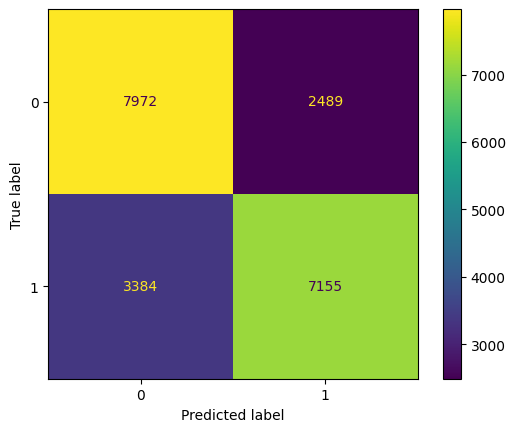

In [36]:
cm = confusion_matrix(y_test, y_pred)          
cmgoruntu = ConfusionMatrixDisplay(confusion_matrix=cm)   #Confusion Matrix'i görsele dökelim.
cmgoruntu.plot()

TN (Gerçek 0, Tahmin 0)	8972	Sağlıklı kişiyi doğru tanımış.                                       
FP (Gerçek 0, Tahmin 1)	2489	Sağlıklı kişiyi yanlışlıkla hasta demiş .                                     
FN (Gerçek 1, Tahmin 0)	3384	Hasta kişiyi sağlıklı demiş.                                     
TP (Gerçek 1, Tahmin 1)	7155	Hasta kişiyi doğru tahmin etmiş. 

Sonuçlarımız pek fazla değişmedi o nedenle bizi verimiz mi sınırlıyor yoksa kullandığımız yöntemler mi yetersiz geliyor onu kontrol edelim. Bu sefer **"RandomForestClassifier"** ile başlayalım

In [37]:
from sklearn.ensemble import RandomForestClassifier         #Gereken modülü import ettik.

In [38]:
model = RandomForestClassifier(random_state=42)           #Modelimizi değişkene atadık.


In [39]:
model.fit(x_train, y_train)              #Modelimizi eğittik.


RandomForestClassifier(random_state=42)

In [40]:
y_pred = model.predict(x_test)


In [41]:

acc = accuracy_score(y_test, y_pred)              #Modelimizin sonuçlarını alalım.
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {pre:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.72
Precision: 0.73
Recall: 0.71
F1 Score: 0.72


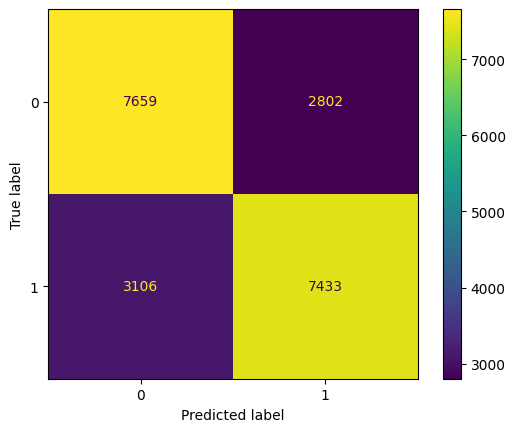

In [42]:
cm = confusion_matrix(y_test, y_pred)          
cmgoruntu = ConfusionMatrixDisplay(confusion_matrix=cm)   #Confusion Matrix'i görsele dökelim.
cmgoruntu.plot()

TN (Gerçek 0, Tahmin 0)	7659	Sağlıklı kişiyi doğru tanımış.                                       
FP (Gerçek 0, Tahmin 1)	2802	Sağlıklı kişiyi yanlışlıkla hasta demiş .                                     
FN (Gerçek 1, Tahmin 0)	3106	Hasta kişiyi sağlıklı demiş.                                     
TP (Gerçek 1, Tahmin 1)	7433	Hasta kişiyi doğru tahmin etmiş. 

**LogisticRegression yönteminin optimize hali:**

Accuracy: 0.72                                     
Precision: 0.74                             
Recall: 0.68                           
F1 Score: 0.71                               

**RandomForestClassifier ile yapılmış modelin değerleri:**

Accuracy: 0.72                          
Precision: 0.73                             
Recall: 0.71                           
F1 Score: 0.72                             

Görüldüğü üzere **"Recall"** değerimiz 0.03 puan, **F1 skorumuz** ise 0.01 puan artış gösterdi. Bu sonuçlara göre baktığımızda bizi verimiz sınırlıyor gibi gözüküyor. İşimizi şansa bırakmamak adına devam edelim ve son yaptığımız modeli optimize ederek bir kez daha şansımızı deneyelim.

In [43]:
from sklearn.model_selection import RandomizedSearchCV       #Gereken modülü import ettik.

In [44]:
param_dist = {                                #Parametrelerimizi belirliyoruz.
    'n_estimators': [50, 100, 150],           # Ağaç sayısı.
    'max_depth': [None, 10, 20, 30],          # Maksimum derinlik.
    'min_samples_split': [2, 5, 10],          # Dallanma için gereken minimum örnek.
    'min_samples_leaf': [1, 2, 4]             # Yaprakta olması gereken minimum örnek.
}


In [45]:
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,              # Rastgele 30 kombinasyonu dene.
    scoring='f1',           # F1 skoru üzerinden değerlendir.
    cv=3,                   # 3 katlı çapraz doğrulama.
    random_state=42,
    n_jobs=-1               # Tüm işlemcileri kullanarak hızlandır.
)

random_search.fit(x_train, y_train)          #Modelimizi eğittik.


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='f1')

In [46]:
en_iyi_model = random_search.best_estimator_       #En iyi model değişkenimizi belirledik.
y_pred = en_iyi_model.predict(x_test)

In [47]:
acc = accuracy_score(y_test, y_pred)                          #Sonuçları kontrol etmek adına komutlarımızı belirleyip yazdırdık.
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("En İyi Parametreler:", random_search.best_params_)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {pre:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")


En İyi Parametreler: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}
Accuracy: 0.74
Precision: 0.76
Recall: 0.70
F1 Score: 0.73


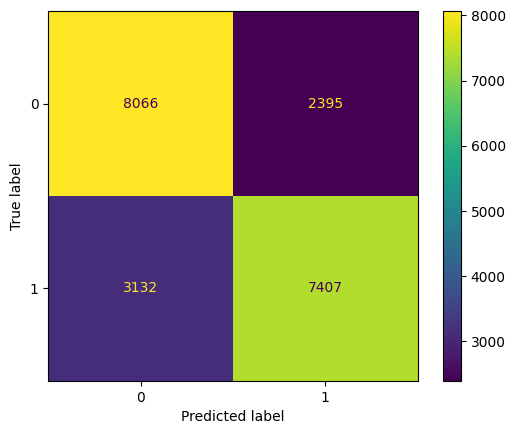

In [48]:
cm = confusion_matrix(y_test, y_pred)          
cmgoruntu = ConfusionMatrixDisplay(confusion_matrix=cm)   #Confusion Matrix'i görsele dökelim.
cmgoruntu.plot()

TN (Gerçek 0, Tahmin 0)	8066	Sağlıklı kişiyi doğru tanımış.                                       
FP (Gerçek 0, Tahmin 1)	2395	Sağlıklı kişiyi yanlışlıkla hasta demiş .                                     
FN (Gerçek 1, Tahmin 0)	3132	Hasta kişiyi sağlıklı demiş.                                     
TP (Gerçek 1, Tahmin 1)	7407	Hasta kişiyi doğru tahmin etmiş. 

**RandomForestClassifier ile yapılmış modelin değerleri:**

Accuracy: 0.72                          
Precision: 0.73                             
Recall: 0.71                           
F1 Score: 0.72       

**Optimize edilmiş RandomForestClassifier ile yapılan modelin değerleri:**

Accuracy: 0.74                                          
Precision: 0.76                                           
Recall: 0.70                                          
F1 Score: 0.73                                      

Önceki modele göre, **"Accuracy"** değeri 0.02, **"Precision"** değeri 0.03, **"F1 Score"** değeri 0.01 artış gösterirken, **"Recall"** değeri 0.01 düşüş yaşadı. Genel olarak baktığımızda ise çok bir artış-düşüş farkı olmamakla birlikte bizi verimizin kısıtladığı gerçeğiyle karşı karşıyayız. Son bir farklı yöntem daha deneyip karşılaştıralım ve bu sefer modelimizi **"XGBClassifier"** ile yapıp test edelim.

In [49]:
from xgboost import XGBClassifier                  #Gereken modülü import ettik.
model = XGBClassifier()                          #Modelimizi değişkene atadık.

In [50]:
model.fit(x_train,y_train)                 #Modelimizi eğittik.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [51]:
y_pred = model.predict(x_test)

In [52]:
acc = accuracy_score(y_test, y_pred)                #Sonuç almak için komutlarımızı girdik ve yazdırdık.
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {acc:.2f}")
print(f"Precision: {pre:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.73
Precision: 0.76
Recall: 0.69
F1 Score: 0.72


Önceki sonuçlar ile hemen hemen aynı sonuçları aldık. O nedenle bu modelimizi de optimize edelim. Optimize etmek için **"RandomizedSearchCV"** kullanacağız.

In [53]:
from sklearn.model_selection import RandomizedSearchCV     #Modülümüzü import ettik.

param_dist = {                                     # Parametrelerimizi ve aralıklarını belirledik.
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}


random_search = RandomizedSearchCV(                         # RandomizedSearch tanımını yaptık.
    estimator=XGBClassifier(random_state=42, eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1
)


random_search.fit(x_train, y_train)    # Modelimizi eğittik.

en_iyi_model = random_search.best_estimator_   
y_pred = en_iyi_model.predict(x_test)         #Modelimize tahmin yaptırdık.

acc = accuracy_score(y_test, y_pred)    #Sonuçlarımızı almak için komutları girdik ve yazdırdık.
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("En İyi Parametreler:", random_search.best_params_)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {pre:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

En İyi Parametreler: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Accuracy: 0.74
Precision: 0.76
Recall: 0.70
F1 Score: 0.73


Evet görüldüğü üzere bizi sınırlayan şey verimiz oldu. Ne yaparsak yapalım skorlarımızı belli bir sınırdan yukarıya çıkartamadık. Son durumdaki tahminlerin durumunu görmek için Confusion Matriximizi çizelim.

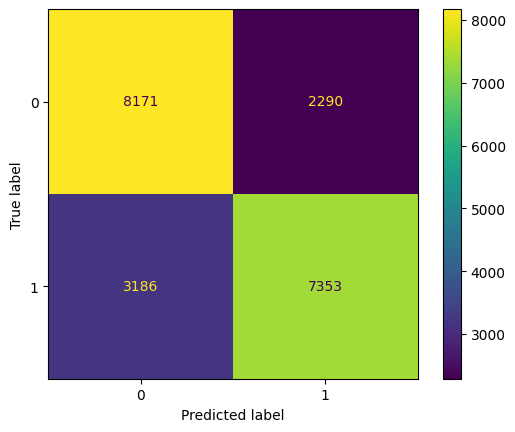

In [54]:
cm = confusion_matrix(y_test, y_pred)          
cmgoruntu = ConfusionMatrixDisplay(confusion_matrix=cm)   #Confusion Matrix'i görsele dökelim.
cmgoruntu.plot()

**Modelimiz**:

TN (Gerçek 0, Tahmin 0)	8171	Sağlıklı kişiyi doğru tanımış.                                       
FP (Gerçek 0, Tahmin 1)	2290	Sağlıklı kişiyi yanlışlıkla hasta demiş .                                     
FN (Gerçek 1, Tahmin 0)	3186	Hasta kişiyi sağlıklı demiş.                                     
TP (Gerçek 1, Tahmin 1)	7353	Hasta kişiyi doğru tahmin etmiş.            

Son durumda önceki tahmin oranlarına göre birazcık daha iyi bir sonuç elde etmiş olduk.